In [98]:
import numpy as np
import random as random
import matplotlib.pyplot as plt



def mykmeans(X, k):
    data=X
    N = data.shape[0]
    numFeatures = data.shape[1]
    labels = -1*np.zeros(N)
    numIterationsCompleted = 0
    means = np.zeros((k,numFeatures))
    
    
    min = np.min(data)
    max = np.max(data)
    
    #Fill mean vector with random values(initial mean)
    for i in range(k):
        for f in range(numFeatures):
            means[i][f] = random.uniform(min, max)
    
     # Implementing l2 norm to get mean distances
    while(True): 
        for i in range(N):
            distmin =np.sqrt((np.linalg.norm(data[i] - means[0]))**2)
            minindex = 0
            for j in range(k):
                #Find distance to each mean. Take the smallest one.
                distcurrent = np.sqrt((np.linalg.norm(data[i] - means[j]))**2)
                if(distcurrent < distmin):
                    distmin = distcurrent
                    minindex = j
            labels[i] = minindex
    
        dummy = True
        for i in range(k):
            datalabeli = data[np.where(labels == i)]
            newmeanforlabeli = np.mean(datalabeli,0)
            for f in range(numFeatures):
                dummy = dummy and (means[i][f] == newmeanforlabeli[f])
        if(dummy == True):
            #Optimum Found!
            return labels, means
        else:
            for i in range(k):
                datalabeli = data[np.where(labels == i)]
                newmeanforlabeli = np.mean(datalabeli,0)
                means[i] = newmeanforlabeli
        numIterationsCompleted+=1

In [99]:
def main():
    k=3 # change k value here
    mean1 = [-3, 0]
    mean2 = [3, 0]
    mean3 = [0, 3]
    cov = [[1, .75], [.75, 1]] 
    x1, y1 = np.random.multivariate_normal(mean1, cov, 300).T
    x2, y2 = np.random.multivariate_normal(mean2, cov, 300).T
    x3, y3 = np.random.multivariate_normal(mean3, cov, 300).T
    X= np.concatenate([x1,x2,x3])
    Y= np.concatenate([y1,y2,y3])
    Z=np.vstack((X, Y)).T
    Z=np.array(Z)
    plt.plot(X, Y, 'x')
    plt.axis('equal')
    plt.show()
    N = data.shape[0]
    result = mykmeans(Z,k)
    labels= result[0]
    plt.scatter(Z[:,0], Z[:,1], c = labels)
    plt.show
    print(result[1])

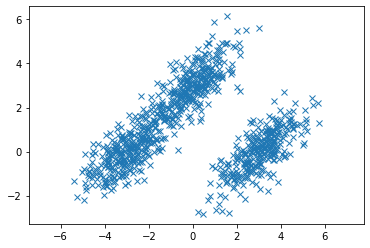

[[-3.03446023 -0.03321855]
 [ 3.03543927  0.01734971]
 [-0.00401931  3.00395819]]


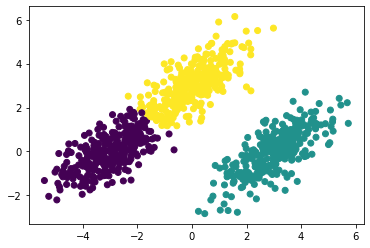

In [100]:
if __name__ == '__main__':

    main()